# 常微分方程式の周期解の精度保証付き数値計算

$\newcommand{\im}{\mathrm{i}}$
常微分方程式の一つであるvan der Pol方程式の周期解の数値計算をまず行い、得た近似解をもとに解の精度保証の方法を紹介する。

### van der Pol 方程式
van der Pol方程式とは、以下のような方程式である。

$$
\frac{d^2 x}{dt^2} - \mu (1-x^2)\frac{dx}{dt} + x = 0.
$$

$x(t)$ が未知関数で、$\mu>0$ は非線形の減衰の強さを表すパラメータである。van der Pol方程式をJulia言語の`DifferentialEquations.jl`というパッケージを使って解の挙動を数値計算する。

<!-- ここで、周期解を求めてみよう。

$x(t)$を周期$L$の周期関数とすると、$\omega = \frac{2\pi}{L}$として、

$$
x(t) = \sum_{k \in \mathbb{Z}} a_k e^{\im k\omega t} \\
\frac{dx(t)}{dt} = \sum_{k \in \mathbb{Z}}(\im k \omega) a_k e^{\im k \omega t} \\
\frac{d^2 x(t)}{dt^2} = \sum_{k \in \mathbb{Z}} (-  k^2 \omega^2 )a_k e^{\im k\omega t} \\
x(t)^2 = \sum_{k \in \mathbb{Z}} (a * a)_k e^{\im k \omega t}
$$
 -->

In [15]:
using DifferentialEquations

function vanderpol(du, u , μ ,t)
    x,y = u
    du[1] = y
    du[2] = μ*(1- x ^2)*y - x
end

vanderpol (generic function with 1 method)

In [67]:
u₀ = [0.0; 2.0]
tspan = (0.0, 100)
μ = 1.0
prob = ODEProblem(vanderpol, u₀, tspan, μ)
sol = solve(prob,Tsit5(),reltol=1e-8,abstol=1e-8)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 2044-element Vector{Float64}:
   0.0
   0.009232541136674264
   0.02503848692409142
   0.0435879126511894
   0.0664452197643567
   0.09233090046295041
   0.12139888382691048
   0.15277985837707742
   0.18598700196113963
   0.22027026837640648
   0.25511904177246686
   0.2901157179283844
   0.3250261195014299
   ⋮
  99.27213746507893
  99.3574363106154
  99.44344764665118
  99.52381514028704
  99.59923306171515
  99.66979379530821
  99.73619384348005
  99.79881764690958
  99.8580439376843
  99.91404184262508
  99.96694642317921
 100.0
u: 2044-element Vector{Vector{Float64}}:
 [0.0, 2.0]
 [0.01855031657580365, 2.0184626866340247]
 [0.050703595436878524, 2.050027988176535]
 [0.08907287164168692, 2.0869098185480093]
 [0.13728951954725527, 2.1319144129367222]
 [0.1931256500572916, 2.181938353825508]
 [0.2573461918787154, 2.2363355143882697]
 [0.3284087220380286, 2.292086391150688]
 [0.40544112120841447, 2.34653000

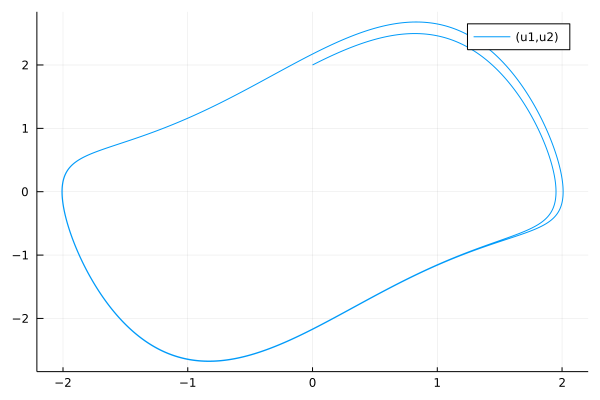

In [68]:
plot(sol,vars=(1,2))

In [45]:
u = hcat(sol.u...)

2×2044 Matrix{Float64}:
 0.0  0.0185503  0.0507036  0.0890729  …  0.00787274  0.126265  0.203269
 2.0  2.01846    2.05003    2.08691       2.18057     2.29477   2.36421

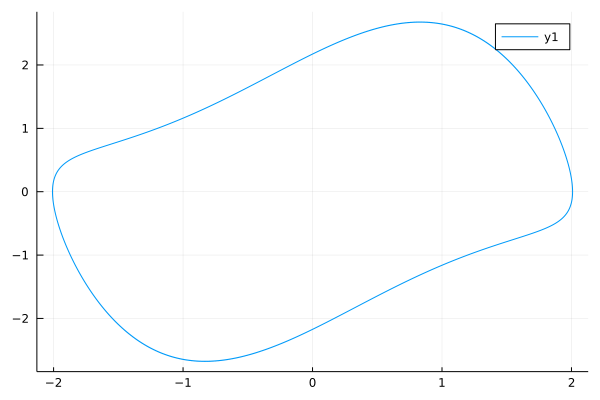

In [55]:
using Plots
ind = floor(Int, length(sol.t)/2)
plot(u[1, ind:end], u[2, ind:end])